In [41]:
import numpy as np
import pandas as pd
import os

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import warnings
warnings.filterwarnings('ignore')

In [42]:
for dirname , _ , filenames in os.walk('C:\\Users\\udit hasija\\Downloads\\archive (1)'):
    for filename in filenames:
        print(os.path.join(dirname , filename))

C:\Users\udit hasija\Downloads\archive (1)\anime.csv
C:\Users\udit hasija\Downloads\archive (1)\rating.csv


In [43]:
anime_data = pd.read_csv('C:\\Users\\udit hasija\\Downloads\\archive (1)\\anime.csv')
rating_data = pd.read_csv('C:\\Users\\udit hasija\\Downloads\\archive (1)\\rating.csv')

In [44]:
print("Shape of anime dats is :" + str(anime_data.shape))
print("Shape of rating data is :" + str(rating_data.shape))

Shape of anime dats is :(12294, 7)
Shape of rating data is :(7813737, 3)


In [45]:
print(anime_data.info())
print("*"*50)
print(rating_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


# Missing 

In [46]:
print("Missing values % in anime data are: \n")
print(round(anime_data.isnull().sum().sort_values(ascending=False)/len(anime_data.index),4)*100)

Missing values % in anime data are: 

rating      1.87
genre       0.50
type        0.20
anime_id    0.00
name        0.00
episodes    0.00
members     0.00
dtype: float64


In [47]:
print("Missing values % in rating data are: \n")
print(round(rating_data.isnull().sum().sort_values(ascending=False)/len(rating_data.index),4)*100)

Missing values % in rating data are: 

user_id     0.0
anime_id    0.0
rating      0.0
dtype: float64


In [48]:
print(anime_data['type'].mode())
print(anime_data['genre'].mode())

0    TV
Name: type, dtype: object
0    Hentai
Name: genre, dtype: object


In [49]:
anime_data = anime_data[~np.isnan(anime_data['rating'])]
anime_data['genre'] = anime_data['genre'].fillna(anime_data['genre'].dropna().mode().values[0])
anime_data['type'] = anime_data['type'].fillna(anime_data['type'].dropna().mode().values[0])


In [50]:
print("Missing values % in anime data are: \n")
print(round(anime_data.isnull().sum().sort_values(ascending=False)/len(anime_data.index),4)*100)

Missing values % in anime data are: 

anime_id    0.0
name        0.0
genre       0.0
type        0.0
episodes    0.0
rating      0.0
members     0.0
dtype: float64


# Cleaning 

In [76]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [77]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

# Merge

In [51]:
anime_full = pd.merge(anime_data , rating_data , on= 'anime_id')
anime_full = anime_full.rename(columns= {'rating_y':'user_rating' , 'rating_x':'rating' , 'name':'anime_name'})

In [52]:
print(anime_full.head(3))

   anime_id      anime_name                                 genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  rating  members  user_id  user_rating  
0        1    9.37   200630       99            5  
1        1    9.37   200630      152           10  
2        1    9.37   200630      244           10  


# Top 10 animes

In [53]:
totalratingcount = (anime_full.groupby(by= ['anime_name'])['user_rating'].count().reset_index()
              .rename(columns={'rating':'totalratingcount'})[['anime_name','user_rating']])
print(totalratingcount.head(4))

                                          anime_name  user_rating
0                                      &quot;0&quot;           26
1  &quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...            2
2  &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...          782
3                 &quot;Bungaku Shoujo&quot; Memoire          809


In [54]:
top10 = totalratingcount[['anime_name' , 'user_rating']].sort_values(by = 'user_rating' , ascending= False).head(10)

Text(0, 0.5, 'User Rating count')

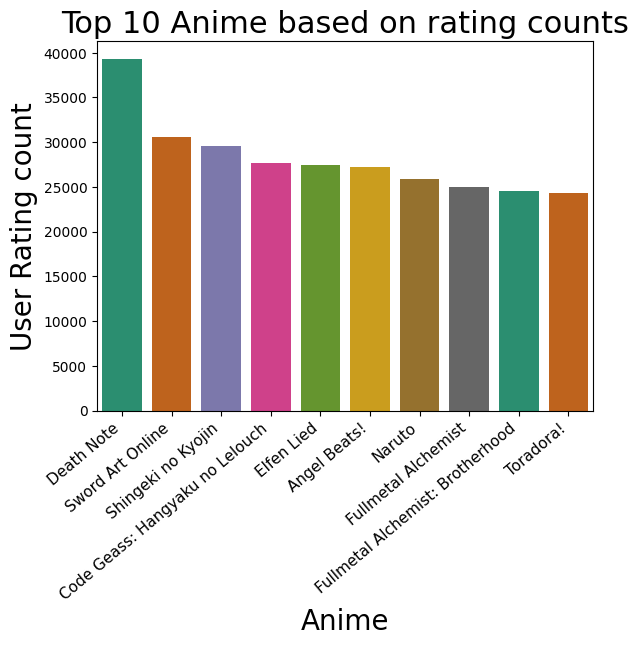

In [55]:
ax=sns.barplot(x="anime_name", y="user_rating", data=top10, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

Text(0.5, 1.0, 'Rating of users')

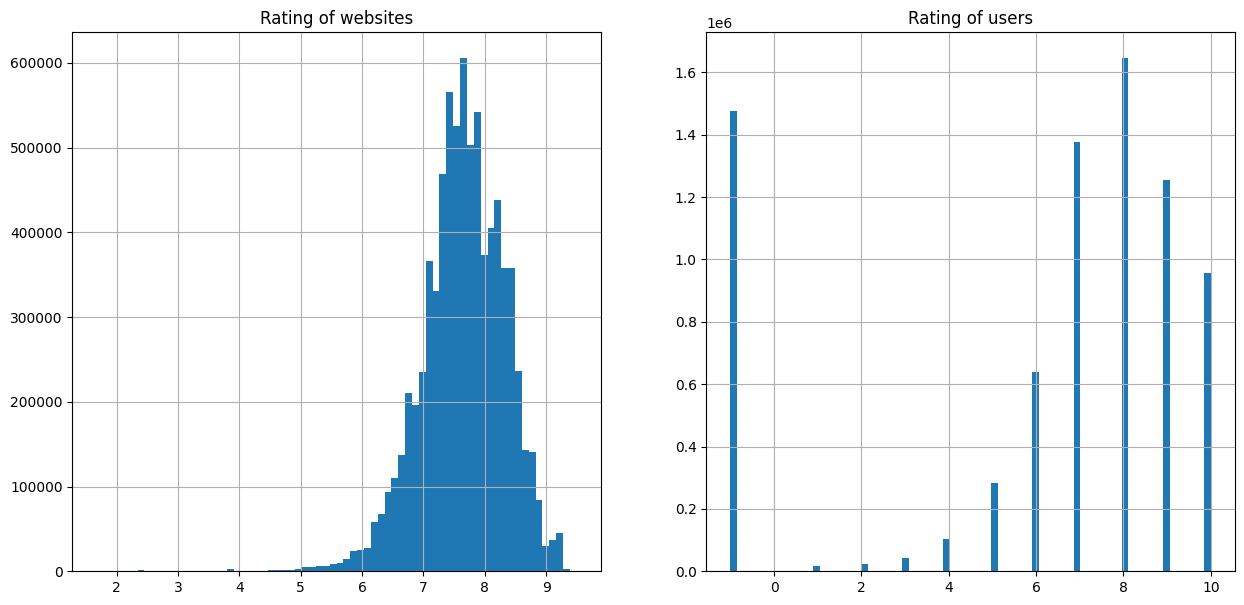

In [56]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_full['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_full['user_rating'].hist(bins=70)
plt.title("Rating of users")

In [57]:
anime_feature = anime_full.copy()

In [58]:
anime_feature['user_id'].value_counts()

user_id
48766    10226
42635     3747
53698     2905
57620     2702
59643     2633
         ...  
57180        1
42128        1
56249        1
23657        1
64425        1
Name: count, Length: 73515, dtype: int64

In [59]:
counts = anime_feature['user_id'].value_counts()

In [60]:
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

In [66]:
anime_pivot = anime_feature.pivot_table(index='anime_name' , columns= 'user_id' , values= 'user_rating').fillna(0)
anime_pivot.head(4)

user_id,5,7,17,38,43,46,54,123,129,139,...,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
anime_name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cosine

In [71]:
from scipy.sparse import csr_matrix
anime_matrix = csr_matrix(anime_pivot.values)

In [70]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [73]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

3774


In [74]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Himouto! Umaru-chanS:

1: Himouto! Umaru-chan: Umaru-chan Mou Ikkai!, with distance of 0.552428030163858:
2: Himouto! Umaru-chan, with distance of 0.7072946663961298:
3: Overlord: Ple Ple Pleiades, with distance of 0.7595085301613613:
4: Prison School OVA, with distance of 0.7786325425448808:
5: Ansatsu Kyoushitsu (TV): Deai no Jikan, with distance of 0.778787967118139:


# Function

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [81]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [82]:
def give_rec(title, sig=sig):
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values ,
                                 'Type': anime_data['type'].iloc[anime_indices].values})

In [83]:
give_rec("Naruto")

,Anime name,Rating,Type
0,Naruto: Shippuuden,7.94,TV
1,Naruto,7.81,TV
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68,Special
3,Naruto x UT,7.58,OVA
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53,Movie
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50,Movie
6,Naruto Shippuuden: Sunny Side Battle,7.26,Special
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11,Movie
8,Battle Spirits: Ryuuko no Ken,4.89,OVA
9,Kyutai Panic Adventure!,5.21,Special


In [ ]:
# step 1
pivot_n = pivot.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

# step 2
pivot_n.fillna(0, inplace=True)

# step 3
pivot_n = pivot_n.T

# step 4
pivot_n = pivot_n.loc[:, (pivot_n != 0).any(axis=0)]

# step 5
piv_sparse = sp.sparse.csr_matrix(pivot_n.values)